# TD de machine Learning : Catégorisation musicale

**Elective** : Machine Learning   
**Professeur** : Théophile Ravillion   
**Date** : Vendredi 23 Avril 2021

## Contexte 
Vous travaillez chez Deezer, département Data Science, félicitations.
D'habiles ingénieurs musicologues ont mis au point un jeu de données contenant des informations sur des morceaux de musique. 
Avec quelques transformées de Fourier et autres joyeusetés propres à leur art, ils ont mis au point deux jeux de données contenant de nombreux indicateurs décrivant un morceau de musique.
Ils comptent sur vous pour mettre au point un algorithme capable d'identifier le genre musical d'un morceau sur la base des différents indicateurs qu'ils ont mis au point.
Vous vous apprétiez à leur demander des informations concernant ces variables mais vous constatez qu'ils sont partis en séminaire d'entreprise et que vous vous retrouvez tout seul avec un jeu d'entrainement étiqueté, un jeu de test et un post-it goguenard de votre chef qui vous demande de faire des prédictions précises sur le jeu de test d'ici 16h.

## Votre défi :
Modéliser le problème, construire un modèle et faire une prédiction de la catégorie à laquelle appartient chaque élément du fichier test.csv à l'aide d'un modèle aussi simple et performant que possible.


## Livrable
Un projet github contenant un notebook + un fichier prédictions.csv contenant les prédictions faites sur le jeu de test

En header le nom des colonnes (music_id et prediction) et pour chacun des morceaux la catégorie prédite.
Merci d'utiliser la virgule comme séparateur 

Bonne chance !

# Feuille de route

Comment procéder ? 
Pour réaliser cet exercice, il vous faudra :

## Récuperer les données 

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sklearn
import seaborn as sns

url_train = "https://raw.githubusercontent.com/RTheophile/td_ml_ynov/main/data/train.csv"
url_test = "https://raw.githubusercontent.com/RTheophile/td_ml_ynov/main/data/test.csv"

df_train = pd.read_csv(url_train, sep=',', decimal='.' )
df_test = pd.read_csv(url_test, sep=',', decimal='.' )


## Analyser les données  
Identifier la distribution de chaque variable  
Données manquantes    
Données aberrantes   
Données corrélées entre elles  

### Boite à outils :   
**Décrire le contenu d'un dataframe pandas**   
`df.info()`   
`df.describe()`   

Gallerie Seaborn : https://seaborn.pydata.org/examples/index.html#   
Histograme : https://seaborn.pydata.org/generated/seaborn.histplot.html   
PairPlot : https://seaborn.pydata.org/generated/seaborn.pairplot.html   
Corrélogramme : https://seaborn.pydata.org/generated/seaborn.heatmap.html   

**Imputation des valeurs manquantes :**   
KNNImputer : https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html  
`df['chroma_0_mean'] = df['chroma_0_mean'].fillna(df['chroma_0_mean'].mean())`  
`df['chroma_0_mean'] = df['chroma_0_mean'].fillna(df['chroma_0_mean'].median())`  
`df['chroma_0_mean'] = df['chroma_0_mean'].fillna(df['chroma_0_mean'].mode())`  

**Quelques fonctions pandas utiles :**  
**Supprimer la ligne** i du dataframe df :   
`df.drop(i, axis=0, inplace=True)`
  
**Supprimer la colonne** c du dataframe df :   
`df.drop(i, axis=1, inplace=True)`
  
**Appliquer la fonction f** sur la colonne c du dataframe df :   
`df[c] = df[c].apply(lambda x : f(x))`

**Selectionner**  les 5 premiers éléments d'un dataframe df :   
`df.head(5)`

**Selectionner**  les 5 derniers éléments d'un dataframe df :   
`df.tail(5)`

**Selectionner**  les éléments d'un dataframe qui satisfont une condition :   
ex : selectionner toutes les lignes dont le prix est supérieur à 100 :  
`df[df['prix'] > 100]`

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 63 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   music_id                320 non-null    int64  
 1   chroma_0_mean           320 non-null    float64
 2   chroma_0_std            320 non-null    float64
 3   chroma_10_mean          320 non-null    float64
 4   chroma_10_std           320 non-null    float64
 5   chroma_11_mean          320 non-null    float64
 6   chroma_11_std           320 non-null    float64
 7   chroma_1_mean           320 non-null    float64
 8   chroma_1_std            320 non-null    float64
 9   chroma_2_mean           320 non-null    float64
 10  chroma_2_std            320 non-null    float64
 11  chroma_3_mean           320 non-null    float64
 12  chroma_3_std            320 non-null    float64
 13  chroma_4_mean           320 non-null    float64
 14  chroma_4_std            320 non-null    fl

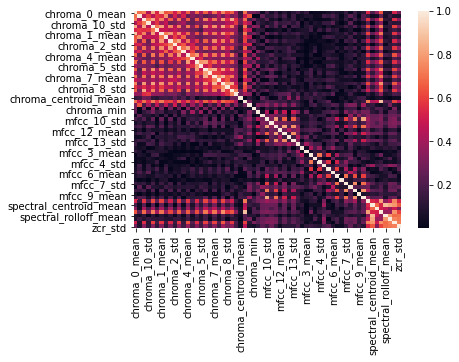

In [104]:
df = df_train
df.info()
df.describe()

for col in df.columns:
    df[col] = df[col].fillna(df[col].mean())

x_test = df_test
x_train = df.drop(['music_id','category'], axis=1)
x_train.head()
y_train = df.category

from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0).fit(x_train)
predict_clf = clf.predict(x_train)
print(predict_clf)

print(x_train.shape)
for i in range(len(predict_clf)):
    if predict_clf[i] == -1 :
      x_train = x_train.drop(i)
      y_train = y_train.drop(i)

print(x_train.shape)

#sns.distplot(y_train, bins=30, kde=True)
#plt.show()
#plt.tight_layout()

correlation_matrix = x_train.corr().abs()
sns.heatmap(data=correlation_matrix)

x_train.drop(['chroma_10_std'], axis=1, inplace=True)
x_train.drop(['chroma_1_mean'], axis=1, inplace=True)
x_train.drop(['chroma_2_std'], axis=1, inplace=True)
x_train.drop(['chroma_4_mean'], axis=1, inplace=True)
x_train.drop(['chroma_5_std'], axis=1, inplace=True)
x_train.drop(['chroma_7_mean'], axis=1, inplace=True)
x_train.drop(['chroma_8_std'], axis=1, inplace=True)
x_train.drop(['chroma_centroid_mean'], axis=1, inplace=True)
x_train.drop(['spectral_rolloff_mean'], axis=1, inplace=True)
x_train.drop(['zcr_std'], axis=1, inplace=True)

## Normaliser les données
Choisir une méthode de normalisation, comparer les résultats obtenus avec différentes méthodes 

### Boite à outils

K-NN : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html   
Robust Scaler : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html   
StandardScaler : 
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler         
MinMaxScaler : 
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler      

In [93]:
from sklearn.preprocessing import RobustScaler

transformer_x_train = RobustScaler().fit(x_train)
transformer_x_test = RobustScaler().fit(x_test)
a_x_train = transformer_x_train.transform(x_train)
b_x_test = transformer_x_test.transform(x_test)

## Etudier l’opportunité d’une réduction de dimension
- Tester les perfs obtenus pour différentes valeurs
- Visualiser la variance expliquée par chaque axe
- Justifier le nombre d’axes retenus

### Boite à outils  
Analyse en composante principale : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html   

In [94]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(a_x_train)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.25689697 0.15158367]
[54.84851126 42.13195009]


## Créer un échantillon non biaisé de validation
A moins que vous n'utilisiez la k-fold validation (stratifiée ?)

### Boite à outil :   
`from sklearn.model_selection import train_test_split`  

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(a_x_train, y_train, test_size = 0.2, random_state = 33)

## Entrainer différents algorithmes de classification

`model = ...`   
`model.fit(X_train, y_train)`

### Boite à outils  
SVM : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html   
Random Forest : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier   
Regression logistique : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html   

In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression 
from sklearn import preprocessing


svr = RandomForestRegressor(n_estimators=1)
svr.fit(X_train,Y_train)
train_score=svr.score(X_train,Y_train)
test_score=svr.score(X_test,Y_test)
print ("training score :", train_score )
print ("test score : ", test_score)

svc= SVC()
svc.fit(X_train,Y_train)
y_predict = svc.predict(X_test)
score = accuracy_score(y_predict, Y_test)
print("Test SVC :",score,"ON LE GARDE !!")


training score : 0.4858156028368794
test score :  -0.4175238095238092
Test SVC : 0.8032786885245902 ON LE GARDE !!


## Comparer la performance de différents algorithmes
Faire des prédictions et evaluer leur justesse de ces prédictions à l'aide de différents indicateurs :
- Matrice de confusion
- Accuracy
- F-Score

### Boite à outils  
Un rapport de performance clé en main : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html   

Liste des différents indicateurs : https://scikit-learn.org/stable/modules/model_evaluation.html

Faire une prédiction avec un model sklearn entrainé :
`y_pred_1 = model_1.predict(X_val, y_val)`   





## Optimiser les hyper-paramètres de l’algorithme retenu
Tester différents hyper-paramètres pour tirer au mieux partit de l'algorithme retenu

### Boite à outils  
GridSearchCV :  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html



In [111]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

parameters = {'mfcc_3_mean'}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(a_x_train, y_train)

sorted(clf.cv_results_.keys())

ValueError: ignored

## Prédire des valeurs pour le jeu de test 
Créer un fichier au format .csv contenant  vos prédictions.
En header le nom des colonnes (music_id et prediction) et pour chacun des morceaux la catégorie prédite.

Vérifier que votre notebook fonctionne avant de le rendre 

### Boite à outils  
exporter un dataFrame pandas au format csv :
`df_test.to_csv('data/test.csv' , sep=',', decimal='.')`

In [110]:
df_test.to_csv('data/test.csv' , sep=',', decimal='.')

FileNotFoundError: ignored